In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
data = load_breast_cancer()

X = data.data
y = data.target


In [3]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

print("Class distribution:")
print(pd.Series(y).value_counts())


Features shape: (569, 30)
Target shape: (569,)
Class distribution:
1    357
0    212
Name: count, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)



Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8964 - loss: 0.4489 - val_accuracy: 0.9451 - val_loss: 0.3197
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9514 - loss: 0.2998 - val_accuracy: 0.9451 - val_loss: 0.2379
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9411 - loss: 0.2329 - val_accuracy: 0.9451 - val_loss: 0.1914
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9576 - loss: 0.1763 - val_accuracy: 0.9560 - val_loss: 0.1625
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9683 - loss: 0.1291 - val_accuracy: 0.9560 - val_loss: 0.1424
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9791 - loss: 0.1086 - val_accuracy: 0.9670 - val_loss: 0.1294
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9890 - loss: 0.0966 - val_accuracy: 0.9780 - val_loss: 0.1194
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9870 - loss: 0.0869 - val_accuracy: 0.9780 - v

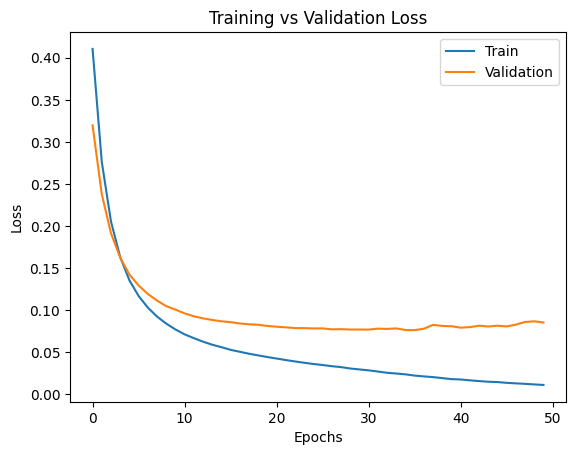

In [9]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


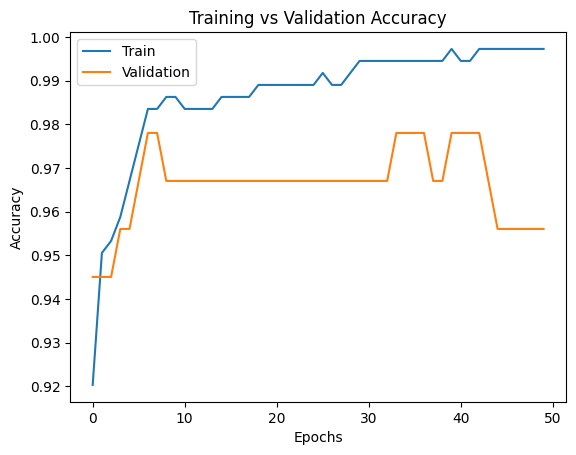

In [10]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9707 - loss: 0.1035 
Test Accuracy: 0.9736841917037964


In [12]:
y_pred_prob = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [13]:
y_pred = (y_pred_prob > 0.5).astype(int)


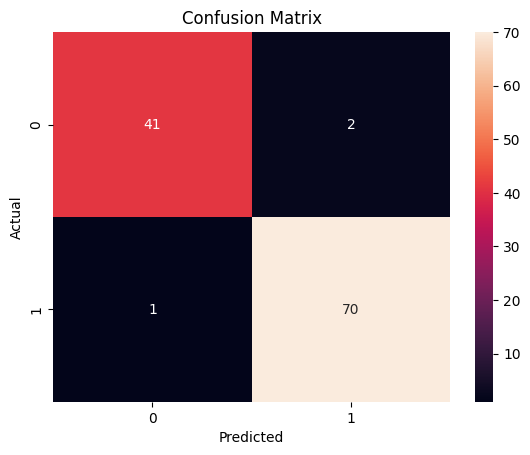

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [16]:
new_sample = X_test[0].reshape(1, -1)

prediction_prob = model.predict(new_sample)
prediction = (prediction_prob > 0.5).astype(int)

print("Probability:", prediction_prob)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Probability: [[0.97566146]]
Prediction: [[1]]
